<p><b>Problem Scenario:</b> You are hired by one of the major AI giants, planning to build the best image classifier model available till date. In the first phase of model development, the input is passed from the MNIST dataset. MNIST dataset is one of the most common datasets used for image 
classification and is accessible from many different sources. It is a subset of a larger set available from NIST and contains 60,000 training images and 10,000 testing images on handwritten digits taken from American Census Bureau employees and American high school students.</p>

<b>Objective:</b>
Build a perceptron -based classification model to:
<li>Classify the handwritten digits properly</li>
<li>Make predictions</li>
<li>Evaluate model efficiency</li>

# Import Packages

In [1]:
#Import MNIST dataset from Keras
from keras.datasets import mnist
#import matplotlib for graphical representation
from matplotlib import pyplot as plt
#Import model architectures
from keras.layers import Dense, Flatten , Dropout
from keras.models import Sequential
from keras.utils import to_categorical
#Import matplotlib for data visualizarion
from matplotlib import style

In [2]:
#Load MNIST dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape) #60000 images/digit each 28x28 pixel

(60000, 28, 28)


# Model Architecture 

In [4]:
#Build the Architecture
model=Sequential()
model.add(Flatten(input_shape=(28,28))) # flattening the image of pixel 28x28
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(10,activation='softmax')) # this should be 10 as output - 0 to 9 digits


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


# Compiling Model

In [6]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
y_train=to_categorical(y_train)

In [8]:
y_test=to_categorical(y_test)

In [9]:
X_train.max() #Maximum pixel size

255

In [10]:
X_train.min() #Minimum pixel size

0

# Scaling Data

In [11]:
# Scale Data
X_train=X_train/255.   #. used to keep in float and divide by 255 to comw up with 0 or 1
X_test=X_test/255.

# Training Model

In [12]:
#Train the model
res=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 1s 467us/step - loss: 1.1439 - accuracy: 0.7646 - val_loss: 0.6072 - val_accuracy: 0.8755
Epoch 2/20
1875/1875 [==============================] - 1s 377us/step - loss: 0.4964 - accuracy: 0.8827 - val_loss: 0.4111 - val_accuracy: 0.8981
Epoch 3/20
1875/1875 [==============================] - 1s 381us/step - loss: 0.3810 - accuracy: 0.8996 - val_loss: 0.3457 - val_accuracy: 0.9088
Epoch 4/20
1875/1875 [==============================] - 1s 371us/step - loss: 0.3351 - accuracy: 0.9087 - val_loss: 0.3180 - val_accuracy: 0.9142
Epoch 5/20
1875/1875 [==============================] - 1s 403us/step - loss: 0.3097 - accuracy: 0.9141 - val_loss: 0.2990 - val_accuracy: 0.9173
Epoch 6/20
1875/1875 [==============================] - 1s 395us/step - loss: 0.2935 - accuracy: 0.9179 - val_loss: 0.2922 - val_accuracy: 0.9189
Epoch 7/20
1875/1875 [==============================] - 1s 391us/step - loss: 0.2821 - accuracy: 0.9211 - val_loss: 0.2809 -

# Data Visualization

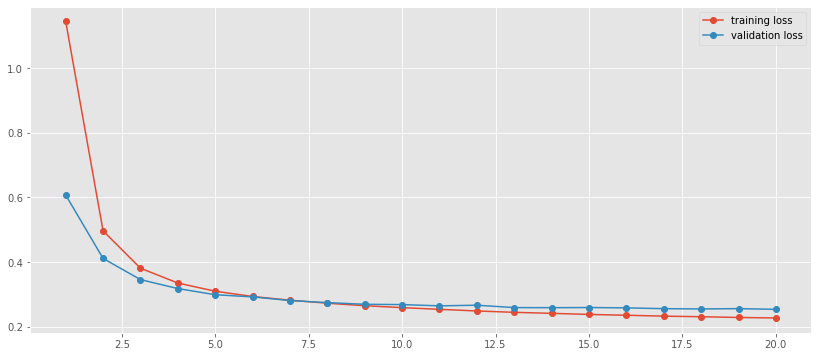

In [33]:
#training and validation loss as per the each ephoce
style.use('ggplot')
plt.figure(figsize=(14,6))
plt.plot(range(1,21),res.history['loss'],marker='o',label='training loss')
plt.plot(range(1,21),res.history['val_loss'],marker='o',label='validation loss')
plt.legend()
plt.show()

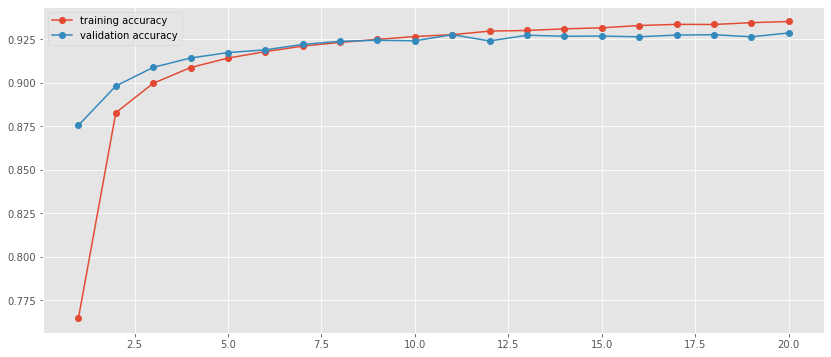

In [15]:
#training and validation accuracy as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(range(1,21),res.history['accuracy'],marker='o',label='training accuracy')
plt.plot(range(1,21),res.history['val_accuracy'],marker='o',label='validation accuracy')
plt.legend()
plt.show()

In [16]:
res.history

{'loss': [1.1438895463943481,
  0.4963996410369873,
  0.3809521198272705,
  0.33511078357696533,
  0.3097394108772278,
  0.29348626732826233,
  0.2820541560649872,
  0.2726372182369232,
  0.2649640738964081,
  0.25898540019989014,
  0.2537834048271179,
  0.24868598580360413,
  0.24450643360614777,
  0.24139918386936188,
  0.23799046874046326,
  0.2354557365179062,
  0.23274828493595123,
  0.2308925837278366,
  0.22859714925289154,
  0.22705045342445374],
 'accuracy': [0.7646333575248718,
  0.8827333450317383,
  0.899649977684021,
  0.9087166786193848,
  0.9141499996185303,
  0.9178666472434998,
  0.9210500121116638,
  0.9231666922569275,
  0.9248999953269958,
  0.9265499711036682,
  0.9276166558265686,
  0.9296666383743286,
  0.9300333261489868,
  0.9309666752815247,
  0.9315666556358337,
  0.9328833222389221,
  0.9335500001907349,
  0.933483362197876,
  0.9345166683197021,
  0.9352166652679443],
 'val_loss': [0.6072149872779846,
  0.41112571954727173,
  0.34568485617637634,
  0.317977

# End of Project

#########################

In [37]:
#verify the prediction

test_img = X_train[100]  #choosing random number predict for our reference
test_img.shape

(28, 28)

In [20]:
img=test_img.reshape(1,-1)  #Flattening the image

In [21]:
img.shape

(1, 784)

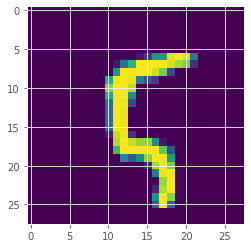

In [22]:
plt.imshow(test_img)

In [38]:
print(model.predict_classes(img)) #Class name = 0

[5]


In [24]:
#######################